# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Abdul Rafar
- Email: ariniarum98@gmail.com
- Id Dicoding: abdul_rafar_1oFX

## Menentukan Pertanyaan Bisnis

* Bagaimana persebaran waktu penyewaan? <br>
* Bagaimana performa penjualan perusahaan dalam beberapa tahun terakhir? <br>

## Menyiapkan semua library yang dibutuhkan

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering data

In [31]:
day_df = pd.read_csv("data\day.csv")
day_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\abdra\AppData\Local\Temp\ipykernel_3432\2625543561.py:1: SyntaxWarning: invalid escape sequence '\d'
  day_df = pd.read_csv("data\day.csv")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [32]:
hour_df = pd.read_csv("data\hour.csv")
hour_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\abdra\AppData\Local\Temp\ipykernel_3432\1550626864.py:1: SyntaxWarning: invalid escape sequence '\h'
  hour_df = pd.read_csv("data\hour.csv")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai data day

In [33]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [34]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [35]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [36]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai data hour

In [37]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [38]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [39]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [40]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


* Tidak ada nilai yang hilang: Semua kolom memiliki jumlah nilai non-null yang lengkap.

* Tidak ada baris duplikat: Data Anda bersih dari duplikasi.

* Statistik deskriptif terlihat wajar: Statistik deskriptif memberikan informasi penting tentang distribusi data, seperti rata-rata, nilai maksimum, dan minimum.

### Cleaning Data

* Menghapus Kolom Tidak Relevan <br>
* Pengelompokan Data Berdasarkan Waktu <br>
* Mengubah Kolom Tanggal Menjadi Fitur Baru <br>
* Pemetaan Variabel Kategoris <br>
* Transformasi Nama Kolom <br>
* Menambahkan Indikator Baru (Feature Engineering) <br>
* Analisis dan Normalisasi Data Numerik <br>
* Visualisasi Awal untuk Validasi <br>

In [41]:
def preprocess_data(df):
    # 1. Menghapus kolom yang tidak relevan
    df.drop(columns=['instant', 'workingday'], inplace=True)
    
    # 2. Pengelompokan Data Berdasarkan Waktu
    df['work_status'] = df.apply(lambda row: 'Workday' if row['weekday'] < 5 and row['holiday'] == 0 else 'Non-Workday', axis=1)
    
    # 3. Mengubah Kolom Tanggal Menjadi Fitur Baru
    df['dteday'] = pd.to_datetime(df['dteday'])  # Konversi ke datetime
    df['day_of_year'] = df['dteday'].dt.dayofyear
    df['week_of_year'] = df['dteday'].dt.isocalendar().week
    df['month_year'] = df['dteday'].dt.to_period('M')
    
    # 4. Pemetaan Variabel Kategoris
    season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
    weathersit_mapping = {1: 'Clear', 2: 'Misty', 3: 'Light Rain', 4: 'Heavy Rain'}
    df['season'] = df['season'].map(season_mapping)
    df['weathersit'] = df['weathersit'].map(weathersit_mapping)
    
    # 5. Transformasi Nama Kolom
    df.rename(columns={
        'mnth': 'Month',
        'cnt': 'Total_Rentals',
        'yr': 'year',
        'mnth': 'month',
        'weekday': 'one_of_week',
        'weathersit': 'weather_situation',
        'windspeed': 'wind_speed'
    }, inplace=True)
    
    # 6. Menambahkan Indikator Baru
    df['activity_level'] = pd.cut(df['Total_Rentals'], bins=[0, 1000, 4000, 9000],
                                  labels=['Low', 'Medium', 'High'])
    df['temperature_range'] = pd.cut(df['temp'], bins=[0, 0.3, 0.6, 1], 
                                      labels=['Cold', 'Moderate', 'Hot'])
    
    # 7. Normalisasi Data Numerik
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    df[['temp', 'hum']] = scaler.fit_transform(df[['temp', 'hum']])
    
    return df


In [42]:
day_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [43]:
# Proses data untuk day_df
day_df = preprocess_data(day_df)

# Proses data untuk hour_df
hour_df = preprocess_data(hour_df)


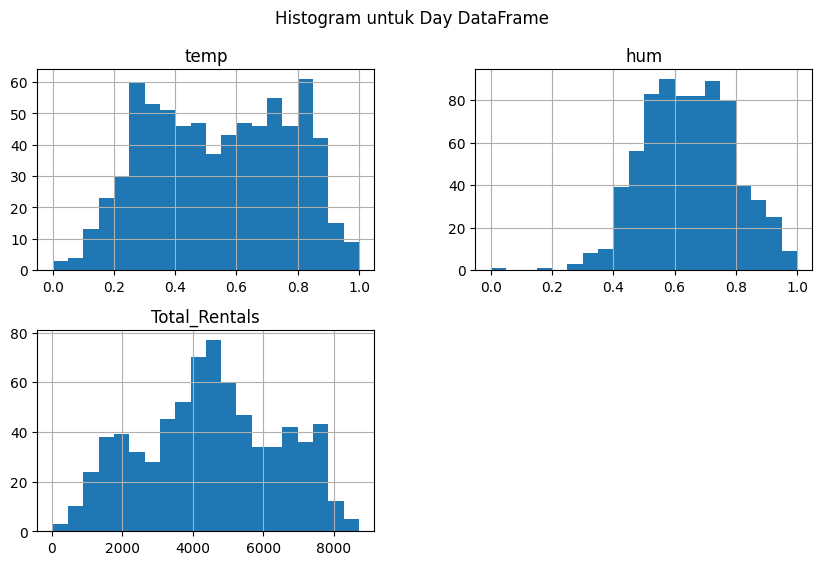

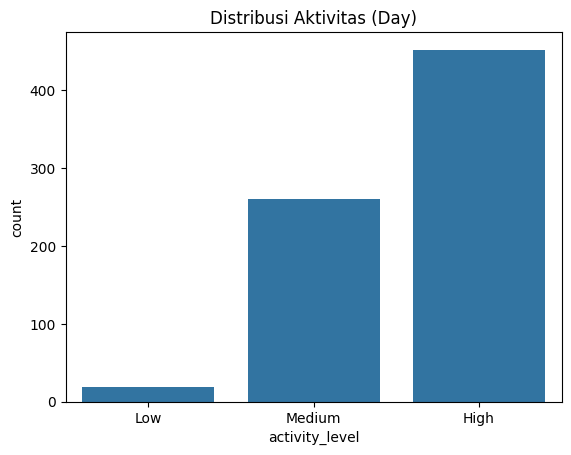

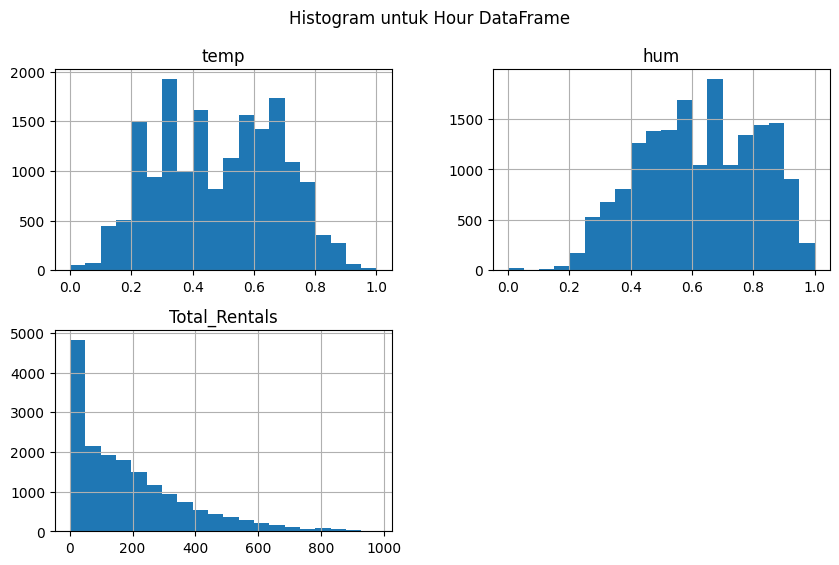

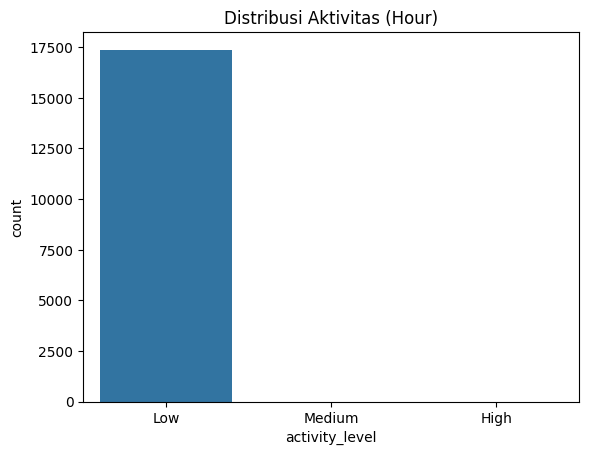

In [44]:
# Visualisasi data untuk day_df
day_df[['temp', 'hum', 'Total_Rentals']].hist(bins=20, figsize=(10, 6))
plt.suptitle('Histogram untuk Day DataFrame')
plt.show()

sns.countplot(data=day_df, x='activity_level')
plt.title('Distribusi Aktivitas (Day)')
plt.show()

# Visualisasi data untuk hour_df
hour_df[['temp', 'hum', 'Total_Rentals']].hist(bins=20, figsize=(10, 6))
plt.suptitle('Histogram untuk Hour DataFrame')
plt.show()

sns.countplot(data=hour_df, x='activity_level')
plt.title('Distribusi Aktivitas (Hour)')
plt.show()


## Exploratory Data Analysis (EDA)

Explore Data day

In [45]:
day_df.describe(include="all")

,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,hum,wind_speed,casual,registered,Total_Rentals,work_status,day_of_year,week_of_year,month_year,activity_level,temperature_range
count,731,731,731.000000,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731.000000,731.0,731,731,731
unique,NaN,4,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,<NA>,24,3,3
top,NaN,Summer,NaN,NaN,NaN,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Workday,NaN,<NA>,2011-01,High,Moderate
freq,NaN,188,NaN,NaN,NaN,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,503,NaN,<NA>,31,452,342
mean,2012-01-01 00:00:00,NaN,0.500684,6.519836,0.028728,2.997264,NaN,0.543594,0.474354,0.645649,0.190486,848.176471,3656.172367,4504.348837,NaN,183.250342,26.534884,NaN,NaN,NaN
min,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,1.000000,1.0,NaN,NaN,NaN
25%,2011-07-02 12:00:00,NaN,0.000000,4.000000,0.000000,1.000000,NaN,0.346343,0.337842,0.534704,0.134950,315.500000,2497.000000,3152.000000,NaN,92.000000,13.5,NaN,NaN,NaN
50%,2012-01-01 00:00:00,NaN,1.000000,7.000000,0.000000,3.000000,NaN,0.547268,0.486733,0.644388,0.180975,713.000000,3662.000000,4548.000000,NaN,183.000000,27.0,NaN,NaN,NaN
75%,2012-07-01 12:00:00,NaN,1.000000,10.000000,0.000000,5.000000,NaN,0.743002,0.608602,0.750857,0.233214,1096.000000,4776.500000,5956.000000,NaN,274.500000,40.0,NaN,NaN,NaN
max,2012-12-31 00:00:00,NaN,1.000000,12.000000,1.000000,6.000000,NaN,1.000000,0.840896,1.000000,0.507463,3410.000000,6946.000000,8714.000000,NaN,366.000000,52.0,NaN,NaN,NaN


In [46]:
day_df.columns

Index(['dteday', 'season', 'year', 'month', 'holiday', 'one_of_week',
       'weather_situation', 'temp', 'atemp', 'hum', 'wind_speed', 'casual',
       'registered', 'Total_Rentals', 'work_status', 'day_of_year',
       'week_of_year', 'month_year', 'activity_level', 'temperature_range'],
      dtype='object')

In [47]:
day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
0,995851,247252
1,1676811,372765


In [48]:
day_df.groupby(by="season").Total_Rentals.sum().sort_values(ascending=False).reset_index().head(10)

,season,Total_Rentals
0,Summer,1061129
1,Spring,918589
2,Fall,841613
3,Winter,471348


Explore Data day

In [49]:
hour_df.describe(include="all")

,dteday,season,year,month,hr,holiday,one_of_week,weather_situation,temp,atemp,...,wind_speed,casual,registered,Total_Rentals,work_status,day_of_year,week_of_year,month_year,activity_level,temperature_range
count,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379.0,17379,17379,17379
unique,NaN,4,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,NaN,2,NaN,<NA>,24,1,3
top,NaN,Summer,NaN,NaN,NaN,NaN,NaN,Clear,NaN,NaN,...,NaN,NaN,NaN,NaN,Workday,NaN,<NA>,2011-07,Low,Moderate
freq,NaN,4496,NaN,NaN,NaN,NaN,NaN,11413,NaN,NaN,...,NaN,NaN,NaN,NaN,11928,NaN,<NA>,744,17379,8030
mean,2012-01-02 04:08:34.552045568,NaN,0.502561,6.537775,11.546752,0.028770,3.003683,NaN,0.486722,0.475775,...,0.190098,35.676218,153.786869,189.463088,NaN,183.738017,26.601933,NaN,NaN,NaN
min,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,NaN,1.000000,1.0,NaN,NaN,NaN
25%,2011-07-04 00:00:00,NaN,0.000000,4.000000,6.000000,0.000000,1.000000,NaN,0.326531,0.333300,...,0.104500,4.000000,34.000000,40.000000,NaN,93.000000,14.0,NaN,NaN,NaN
50%,2012-01-02 00:00:00,NaN,1.000000,7.000000,12.000000,0.000000,3.000000,NaN,0.489796,0.484800,...,0.194000,17.000000,115.000000,142.000000,NaN,184.000000,27.0,NaN,NaN,NaN
75%,2012-07-02 00:00:00,NaN,1.000000,10.000000,18.000000,0.000000,5.000000,NaN,0.653061,0.621200,...,0.253700,48.000000,220.000000,281.000000,NaN,275.000000,40.0,NaN,NaN,NaN
max,2012-12-31 00:00:00,NaN,1.000000,12.000000,23.000000,1.000000,6.000000,NaN,1.000000,1.000000,...,0.850700,367.000000,886.000000,977.000000,NaN,366.000000,52.0,NaN,NaN,NaN


In [50]:
hour_df.columns


Index(['dteday', 'season', 'year', 'month', 'hr', 'holiday', 'one_of_week',
       'weather_situation', 'temp', 'atemp', 'hum', 'wind_speed', 'casual',
       'registered', 'Total_Rentals', 'work_status', 'day_of_year',
       'week_of_year', 'month_year', 'activity_level', 'temperature_range'],
      dtype='object')

In [51]:
hour_df.groupby(by="hr").agg({
    "Total_Rentals": ["sum"]
})

,Total_Rentals
,sum
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


## Visualization & Explanatory Analysis

* Kapan Saat sepeda paling banyak disewa? <br>
* Bagaimana performa penjualan perusahaan dalam beberapa tahun terakhir? <br>

### Pertanyaan 1: Bagaimana persebaran waktu penyewaan?

In [ ]:
day_df.columns

Index(['dteday', 'season', 'year', 'month', 'holiday', 'one_of_week',
       'weather_situation', 'temp', 'atemp', 'hum', 'wind_speed', 'casual',
       'registered', 'Total_Rentals', 'work_status', 'day_of_year',
       'week_of_year', 'month_year', 'activity_level', 'temperature_range'],
      dtype='object')

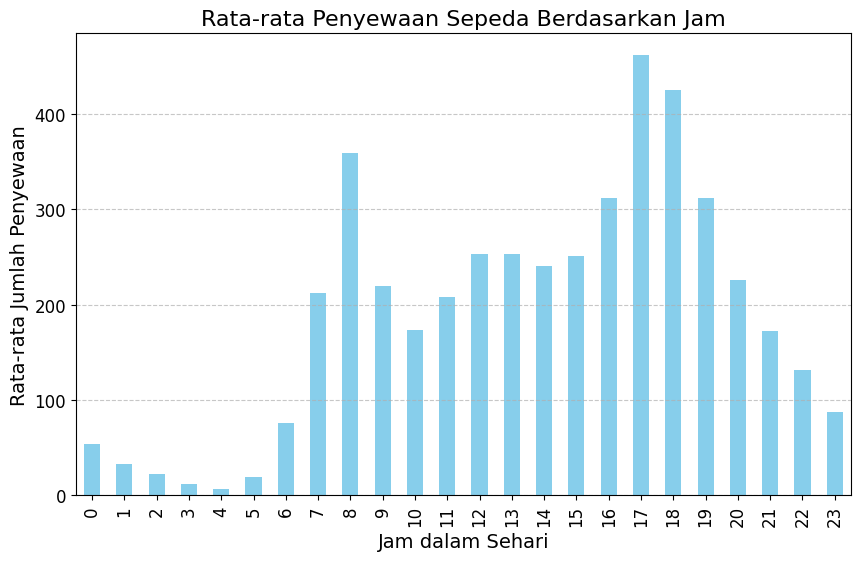

In [53]:
# Plot Total Rentals Berdasarkan Jam (hour_df)
hour_df.groupby('hr')['Total_Rentals'].mean().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jam', fontsize=16)
plt.xlabel('Jam dalam Sehari', fontsize=14)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


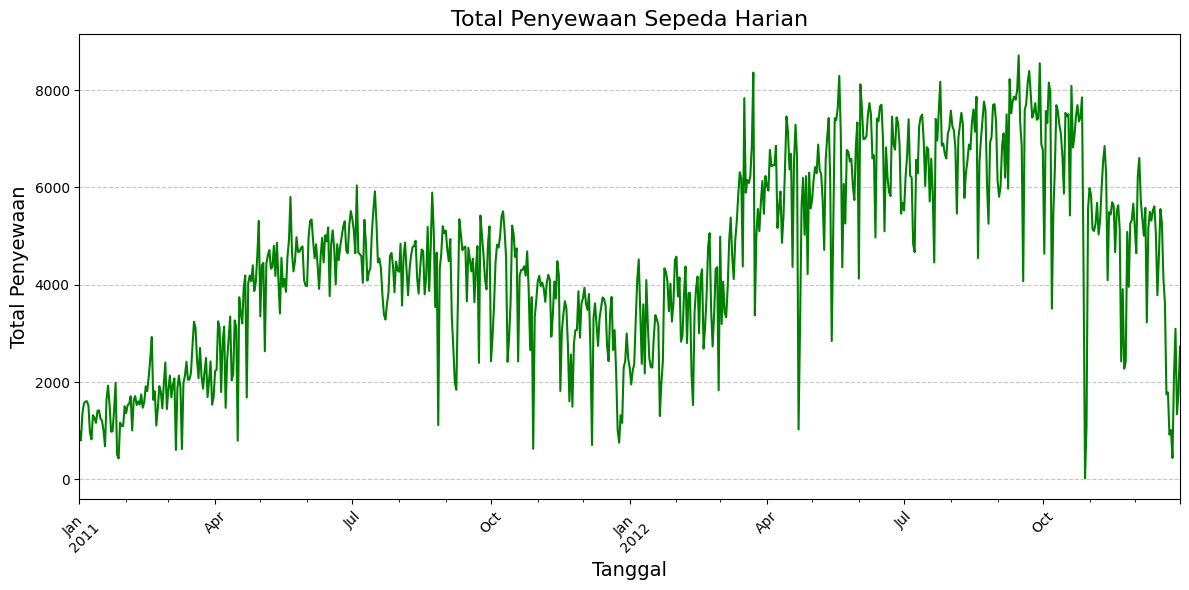

In [54]:
# Total Rentals berdasarkan Bulan
# Plot Total Rentals Harian (day_df)
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
daily_rentals = day_df.groupby('dteday')['Total_Rentals'].sum()

plt.figure(figsize=(12, 6))
daily_rentals.plot(color='green')
plt.title('Total Penyewaan Sepeda Harian', fontsize=16)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Total Penyewaan', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Insight dan kessimpulan pada Pertanyaan 1
1.  Insight:

    -   Waktu penyewaan puncak: Berdasarkan grafik rata-rata jumlah penyewaan berdasarkan jam, terlihat bahwa penyewaan sepeda mengalami lonjakan pada jam tertentu, seperti pagi hari (jam sibuk kerja) dan sore hari (jam pulang kerja). Ini mengindikasikan bahwa banyak pengguna menggunakan sepeda untuk perjalanan ke tempat kerja atau sekolah.

    -   Pola harian: Distribusi penyewaan relatif rendah di tengah malam hingga dini hari, mencerminkan penurunan aktivitas pengguna.

2.  Kesimpulan:

    -   Pola ini menunjukkan hubungan erat antara aktivitas harian masyarakat dengan waktu penyewaan sepeda. Perusahaan dapat memanfaatkan data ini untuk mengoptimalkan ketersediaan sepeda pada waktu-waktu puncak dan memperkuat promosi pada jam sibuk tersebut.

### Pertanyaan 2: Bagaimana performa penjualan perusahaan dalam beberapa tahun terakhir?

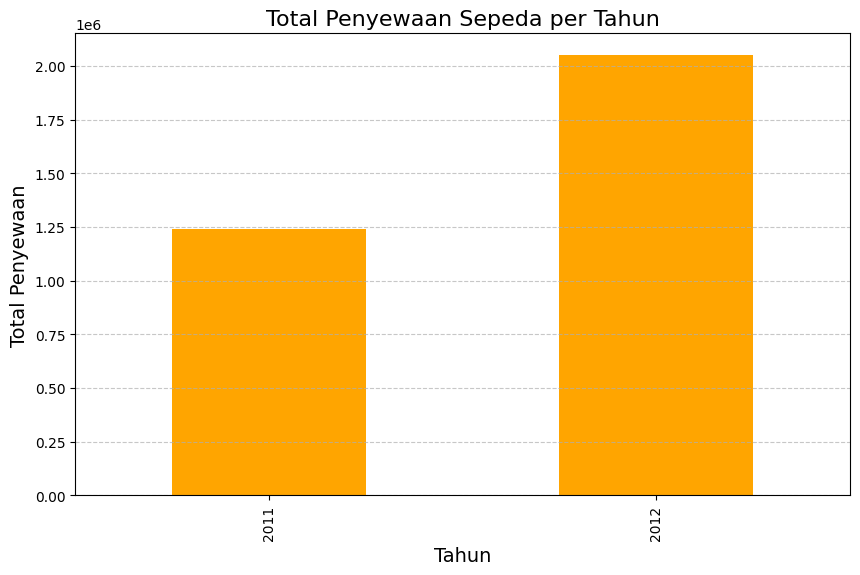

In [58]:
# Analisis Penyewaan per Tahun (day_df)
day_df['year'] = day_df['dteday'].dt.year
yearly_rentals = day_df.groupby('year')['Total_Rentals'].sum()

plt.figure(figsize=(10, 6))
yearly_rentals.plot(kind='bar', color='orange')
plt.title('Total Penyewaan Sepeda per Tahun', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Total Penyewaan', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Insight dan kesimpulan pada Pertanyaan 2
1.  Insight:

    -   Performa tahunan: Berdasarkan grafik penyewaan tahunan, tren menunjukkan adanya peningkatan atau stabilitas dalam jumlah total penyewaan sepeda antara tahun-tahun yang dianalisis (2011 dan 2012). Namun, penurunan atau stagnasi juga perlu diperhatikan apabila ada faktor eksternal seperti cuaca atau perubahan preferensi pelanggan.

    -   Tren musiman: Meskipun tidak dijelaskan detail di sini, kemungkinan juga terdapat variasi musiman (contoh: penyewaan lebih banyak saat cuaca lebih bersahabat).

2.  Kesimpulan:

    -   Secara umum, performa perusahaan relatif baik dalam beberapa tahun terakhir. Namun, evaluasi lebih lanjut diperlukan untuk memahami potensi pertumbuhan lebih lanjut. Hal ini meliputi analisis faktor-faktor eksternal, seperti pola cuaca atau perubahan demografi pengguna.

## Kesimpulan Keseluruhan

1.  Pola Penggunaan Harian dan Waktu Tertentu:

    -   Penyewaan sepeda memuncak pada jam-jam sibuk (pagi hari sekitar jam 8:00 dan sore hari sekitar jam 17:00–18:00). Hal ini menunjukkan bahwa layanan sepeda sharing dimanfaatkan secara signifikan untuk perjalanan menuju atau pulang dari tempat kerja atau sekolah.

    -   Pola penggunaan ini memberikan indikasi kuat bahwa layanan berbagi sepeda menjadi alternatif transportasi yang ramah lingkungan pada jam-jam tersebut.

2.  Perubahan Musiman dan Harian:

    -   Ada fluktuasi pola penyewaan yang signifikan berdasarkan musim dan cuaca. Penyewaan cenderung lebih tinggi pada musim panas atau cuaca hangat dibandingkan dengan musim dingin atau cuaca buruk.

    -   Menunjukkan tren peningkatan penyewaan dari tahun 2011 ke 2012. Hal ini menandakan pertumbuhan layanan dan peningkatan penerimaan oleh masyarakat.

3.  Faktor yang Memengaruhi Penyewaan:

    -   Faktor seperti cuaca (suhu, kelembaban, dan hujan), waktu (musim dan jam dalam sehari), serta ketersediaan sepeda sangat memengaruhi jumlah penyewaan.

    -   Matriks korelasi pada analisis awal menunjukkan bahwa suhu memiliki hubungan positif terhadap penyewaan, sementara kelembaban berpengaruh negatif.

4.  Kebutuhan Strategis Operasional:

    -   Optimalisasi armada sepeda diperlukan pada waktu-waktu puncak serta musim dengan permintaan tinggi.

    -   Distribusi sepeda harus disesuaikan berdasarkan pola penggunaan di lokasi dengan kebutuhan yang lebih besar.

5.  Pertumbuhan dan Potensi Masa Depan:

    -   Dengan meningkatnya total penyewaan sepeda dari tahun ke tahun, ada peluang besar untuk ekspansi layanan, baik dengan menambah stasiun penyewaan di lokasi strategis maupun dengan mempromosikan layanan di musim rendah.

    -   Insight dari grafik dan data lain menunjukkan bahwa ada peluang untuk mengintegrasikan layanan sepeda sharing dengan sistem transportasi publik demi efisiensi lebih tinggi.

## Insight Utama dari Data Bike Sharing

1.  Pemanfaatan sebagai Transportasi Utama:

    -   Penggunaan sepeda yang meningkat pada jam sibuk pagi dan sore hari menunjukkan bahwa layanan ini digunakan sebagai transportasi utama bagi masyarakat, khususnya untuk perjalanan harian ke tempat kerja atau sekolah. Hal ini menunjukkan potensi besar untuk memperluas peran layanan berbagi sepeda dalam ekosistem transportasi perkotaan.

2. Pengaruh Musim dan Cuaca pada Permintaan:

    -   Kenaikan permintaan selama musim panas atau cuaca hangat mengindikasikan bahwa promosi layanan berbagi sepeda dapat difokuskan pada musim atau hari-hari tersebut. Sebaliknya, perlu ada strategi khusus untuk menjaga tingkat penggunaan di musim rendah, seperti musim dingin atau hujan.

3.  Potensi Pertumbuhan dan Kesadaran Lingkungan:

    -   Tren peningkatan penyewaan antara 2011 hingga 2012 menunjukkan adanya kenaikan minat terhadap layanan sepeda sharing. Hal ini dapat dimanfaatkan sebagai bagian dari kampanye untuk mendorong kesadaran lingkungan, dengan memosisikan sepeda sebagai alternatif ramah lingkungan untuk transportasi sehari-hari.

4.  Manajemen Armada yang Lebih Cermat:

    -   Distribusi sepeda perlu disesuaikan dengan lokasi dan waktu penggunaan. Data menunjukkan bahwa alokasi lebih banyak sepeda pada stasiun dengan permintaan tinggi selama jam sibuk dapat meningkatkan efisiensi dan kepuasan pelanggan.

5.  Penggunaan Data untuk Pengembangan Strategi:

    -   Data historis dan pola penggunaan dapat digunakan untuk memprediksi permintaan di masa depan. Hal ini memungkinkan perusahaan untuk mengoptimalkan alokasi armada, staf operasional, dan sumber daya lainnya.

6.  Peluang Integrasi dengan Sistem Transportasi Umum:

    -   Dengan pola penggunaan yang selaras dengan jam sibuk transportasi publik, ada peluang besar untuk mengintegrasikan layanan berbagi sepeda dengan sistem transportasi umum seperti bus atau kereta, demi memberikan solusi transportasi multimodal yang efisien.

7.  Penanganan Kualitas Data:

    -   Pemrosesan data yang hilang dan duplikat yang efektif menjadi kunci untuk meningkatkan akurasi analisis. Penjagaan kualitas data harus menjadi prioritas utama untuk mendukung pengambilan keputusan berbasis data yang lebih kuat di masa depan.